In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rflearn.env import WindGridWorld
from rflearn.algo import MCIteration, TabularQValue, TabularPolicy

# Windy Grid World

In [2]:
env = WindGridWorld()
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)

agent = MCIteration(env, qvalues, policy)
agent.fit(gamma=1, alpha=0.05)

<AxesSubplot:>

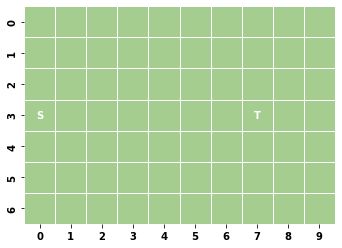

In [3]:
env.plot_grid('st')

In [4]:
agent.transform(1800, kbatch=30, max_steps=None)

100%|██████████| 1800/1800 [00:55<00:00, 32.31it/s]


<AxesSubplot:>

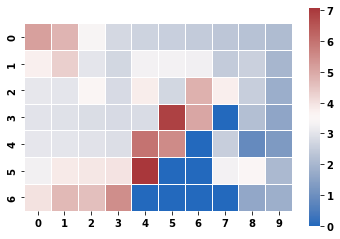

In [6]:
v_vals = np.log(1+-1*qvalues.get_all_values(policy).reshape(env.shape))

sns.heatmap(v_vals, linewidths=0.5, cmap='vlag', square=True)

<AxesSubplot:>

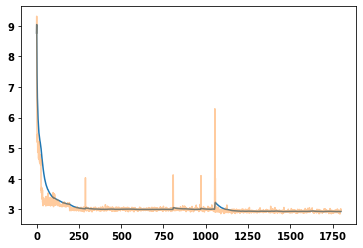

In [9]:
loss = np.log(-1 * pd.Series(agent.hist['avg_r']))

loss.ewm(halflife=25).mean().plot()
loss.plot(alpha=0.4)
# plt.axhline(0, linestyle='--', color='grey',linewidth=1)